In [7]:
import pandas as pd
import seaborn as sns

In [8]:
def fix_data(r: list[str]) -> list[list[str]]:
    result = []
    for row in r:
        splitted = row.split()
        last = splitted[-1]
        result.append([
            int(splitted[0]), 
            float(splitted[1]), 
            int(splitted[2]), 
            int(last), 
            float(splitted[3][len(last):]),
            int(splitted[4]),
            int(splitted[5])
        ])
        
    return result
    

In [9]:
with open("data.txt", "r") as file:
    data = file.readlines()
    
header = data[0]
rows = data[1:]

rows = fix_data(rows)

In [10]:
df = pd.DataFrame(rows, columns=header.split())

In [11]:
df

,allocations,timeSimple,allocatedMemorySimple,usedMemSimple,timeTwin,allocatedMemoryTwin,usedMemTwin
0,10,0.000042,4096,720,0.000229,4096,720
1,20,0.000051,4096,1440,0.000302,4096,1440
2,30,0.000084,4096,2160,0.000430,4096,2160
3,40,0.000189,4096,2880,0.000759,8192,2880
4,50,0.000266,4096,3600,0.000819,8192,3600
...,...,...,...,...,...,...,...
994,9950,14.943900,729088,716400,2.250510,1273856,716400
995,9960,15.133100,729088,717120,2.288250,1277952,717120
996,9970,16.007600,733184,717840,2.927780,1277952,717840
997,9980,15.968900,733184,718560,2.880750,1277952,718560


In [12]:
df["timeSimple"].dtype

dtype('float64')

<Axes: xlabel='allocations', ylabel='value'>

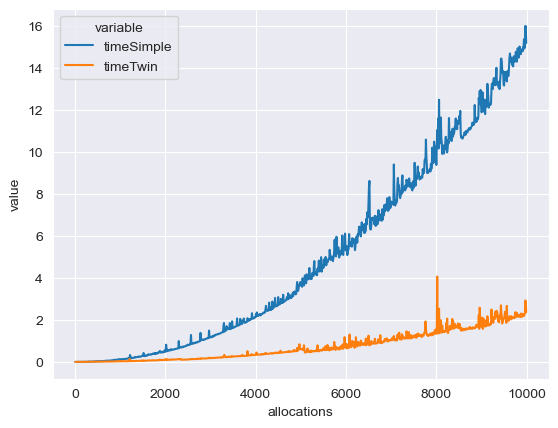

In [16]:
sns.lineplot(data=pd.melt(df[["timeSimple", "timeTwin", "allocations"]], ["allocations"]), x="allocations", y="value", hue="variable")

<Axes: xlabel='allocations', ylabel='value'>

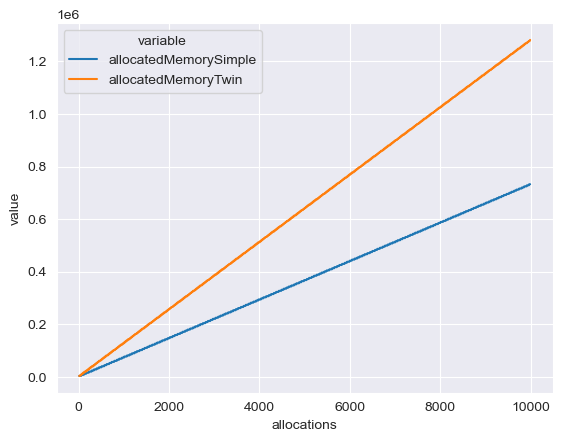

In [17]:
sns.lineplot(data=pd.melt(df[["allocatedMemorySimple", "allocatedMemoryTwin", "allocations"]], ["allocations"]), x="allocations", y="value", hue="variable")

<Axes: xlabel='allocations', ylabel='value'>

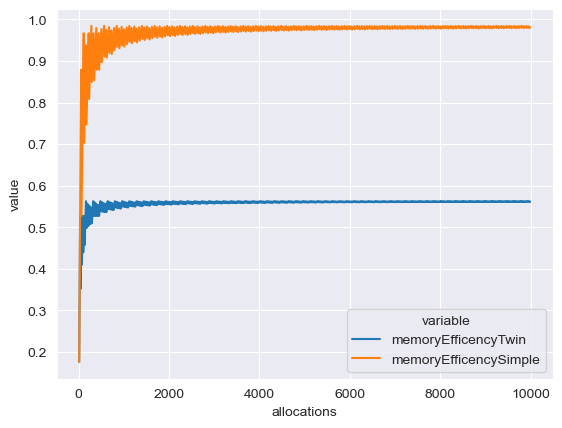

In [18]:
df["memoryEfficencyTwin"] = df["usedMemTwin"] / df["allocatedMemoryTwin"]
df["memoryEfficencySimple"] = df["usedMemSimple"] / df["allocatedMemorySimple"]
sns.lineplot(data=pd.melt(df[["memoryEfficencyTwin", "memoryEfficencySimple", "allocations"]], ["allocations"]), x="allocations", y="value", hue="variable")